# ABCD Graphs


In [1]:
from ABCD.abcd_generation import *

from validation import *
from running_time import *

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
n = 3000
n_reps = 5
range_K = [4, 5, 8, 10, 20, 25, 40, 50, 100]

## Validation


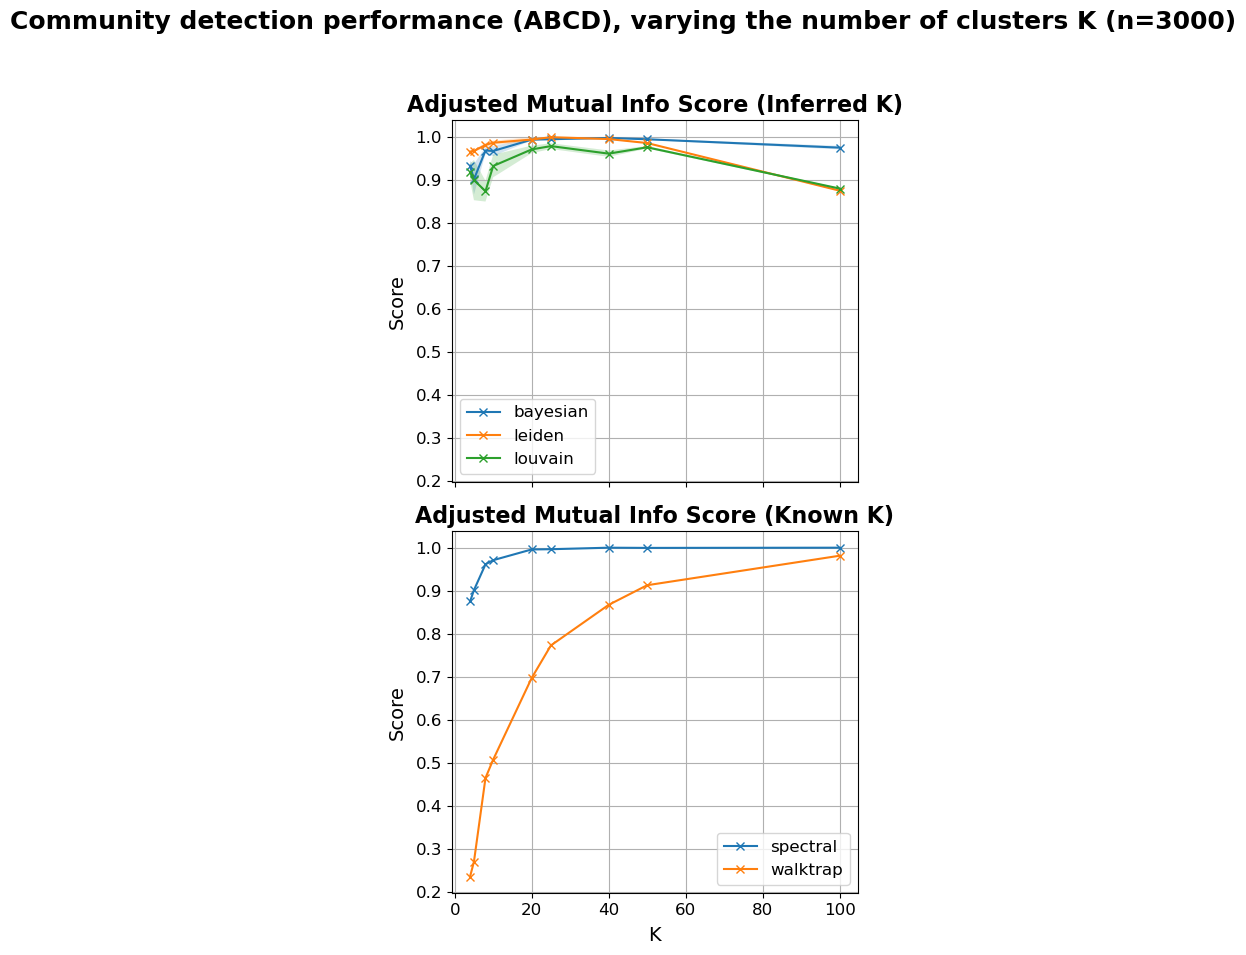

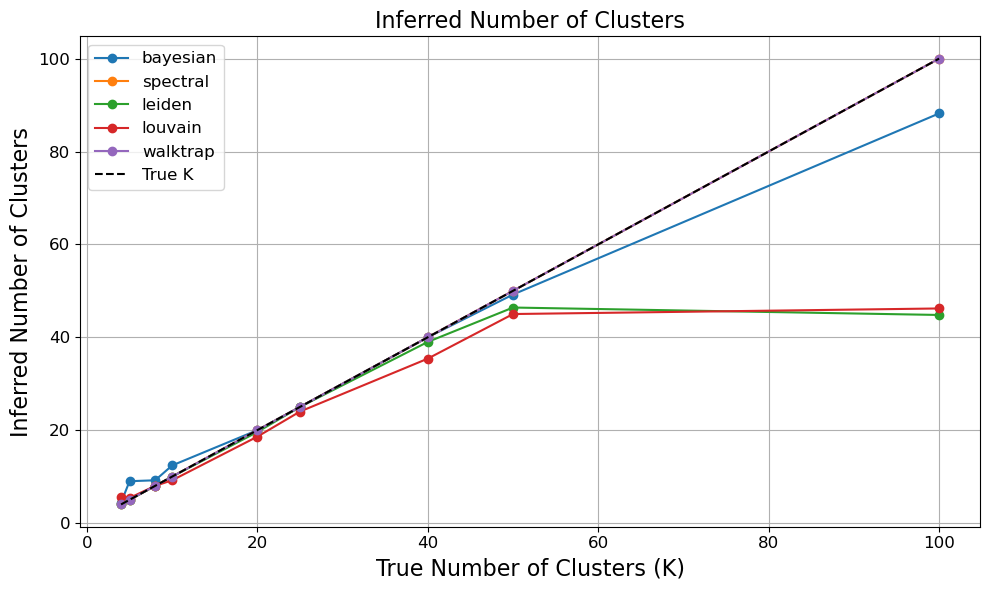

In [3]:
res_mean_K, nb_clusters_K = validation_range_K(range_K=range_K, n=n, n_graphs=n_reps, graph_type="abcd")

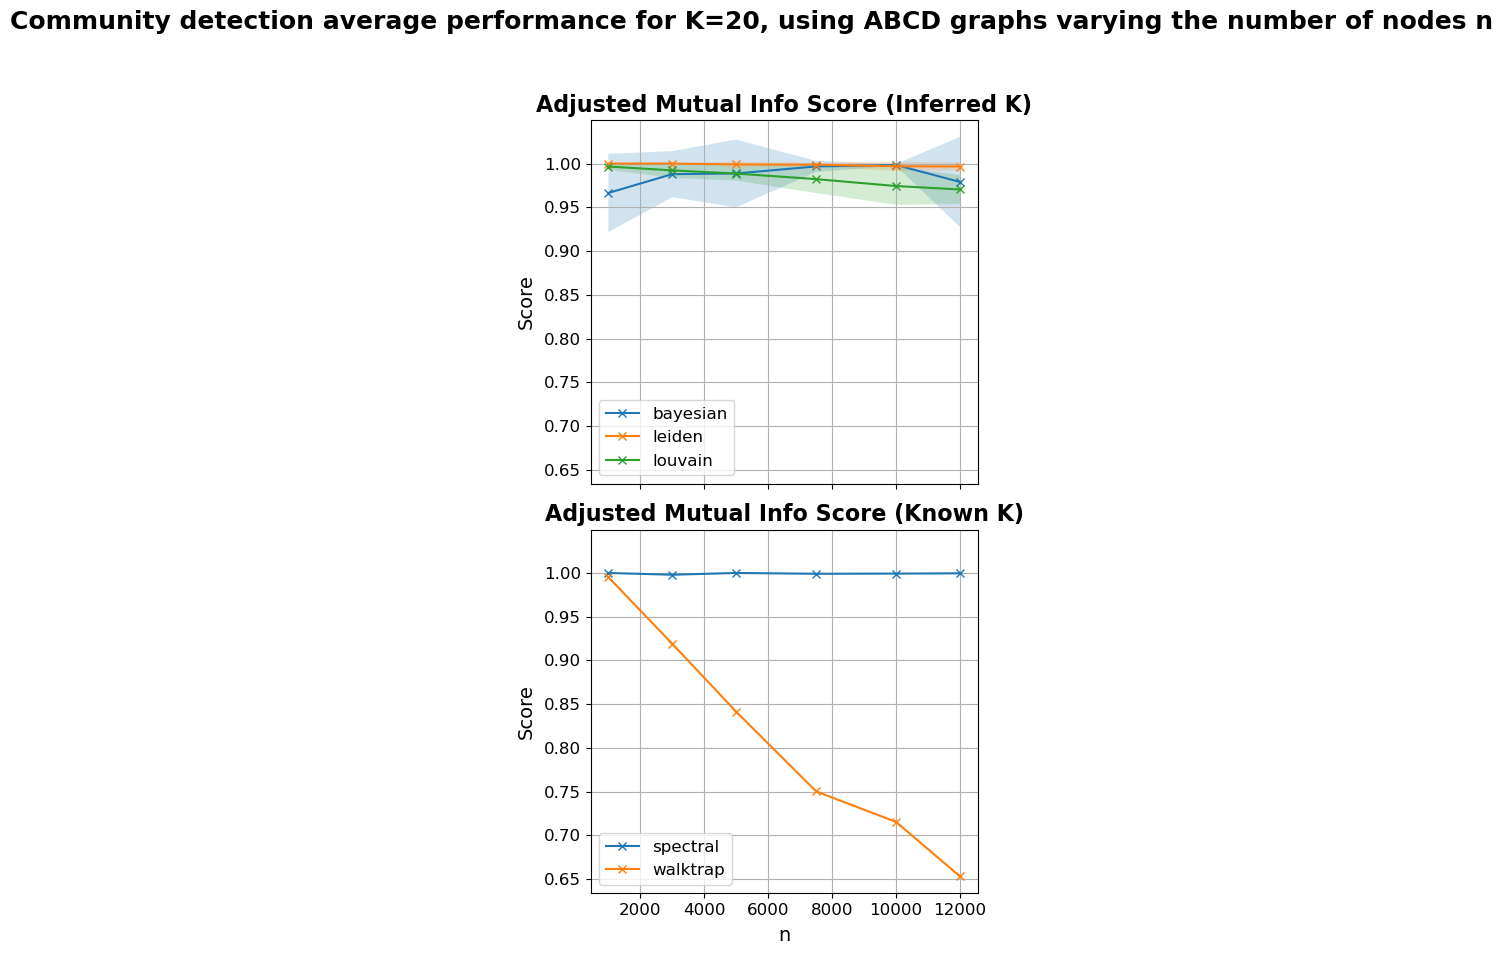

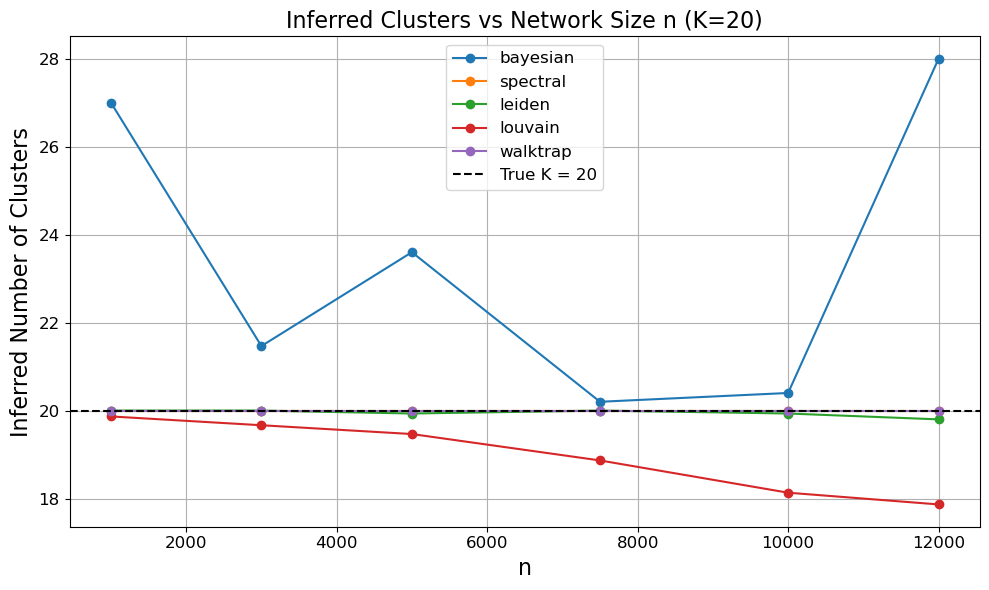

In [7]:
range_n = [1000, 3000, 5000, 7500, 10000, 12000]
res_mean_n, nb_clusters_n = validation_range_n(range_n=range_n, K=20, n_graphs=1, graph_type="abcd")

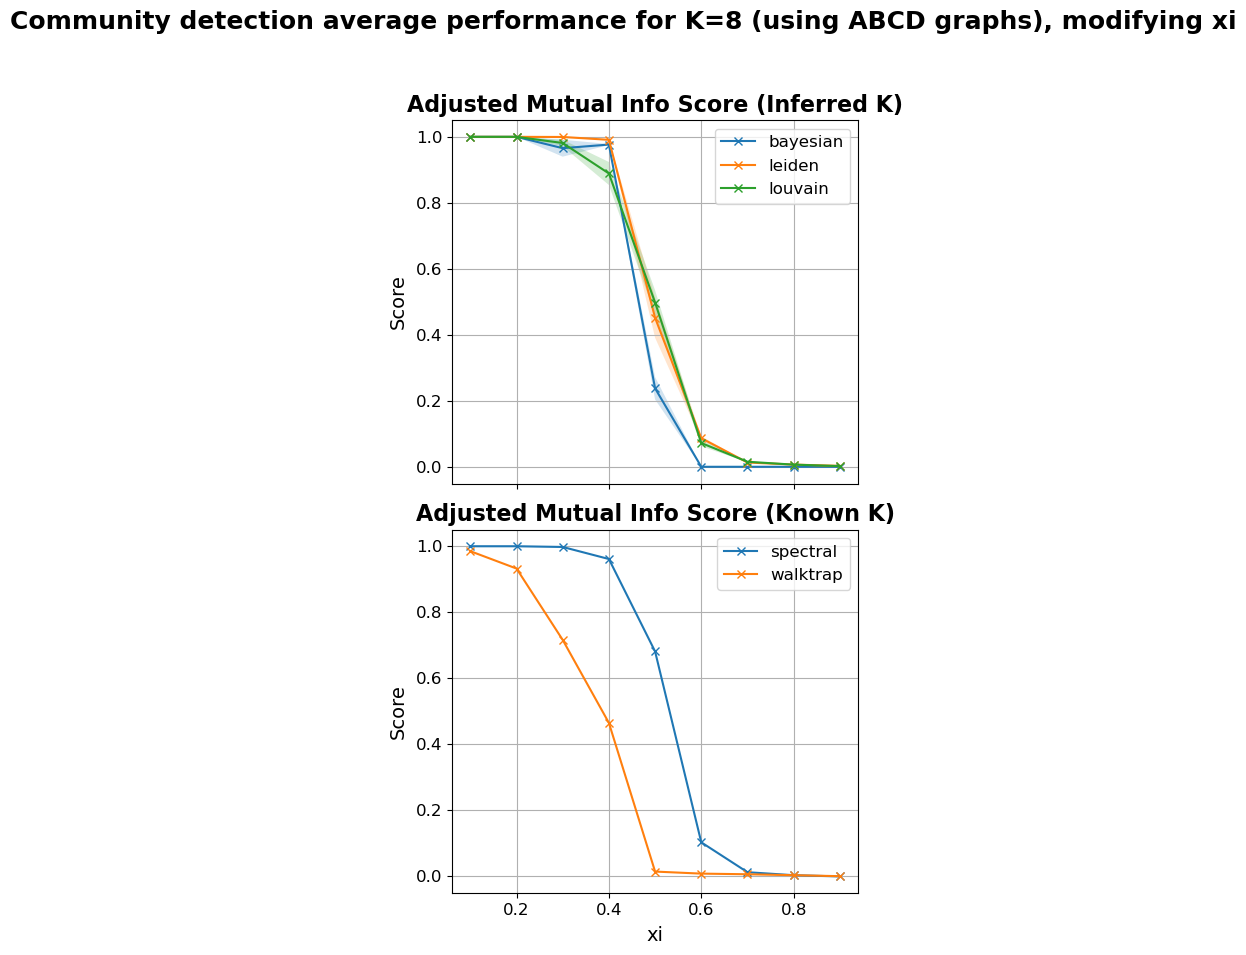

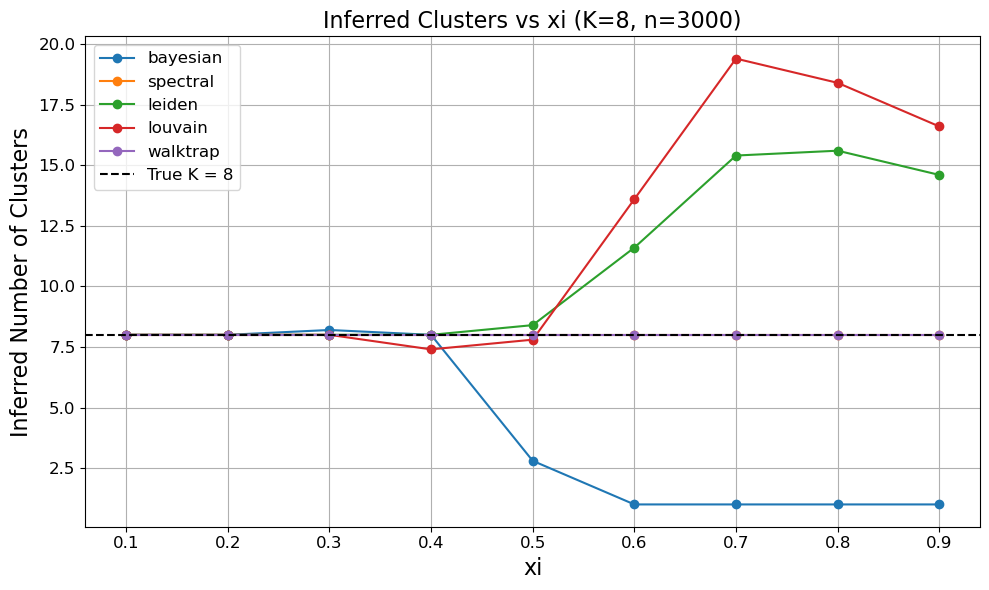

In [4]:
res_mean_p, nb_clusters_p = validation_range_p(K=8, n=n, n_reps=n_reps, graph_type="abcd")

## Running Time


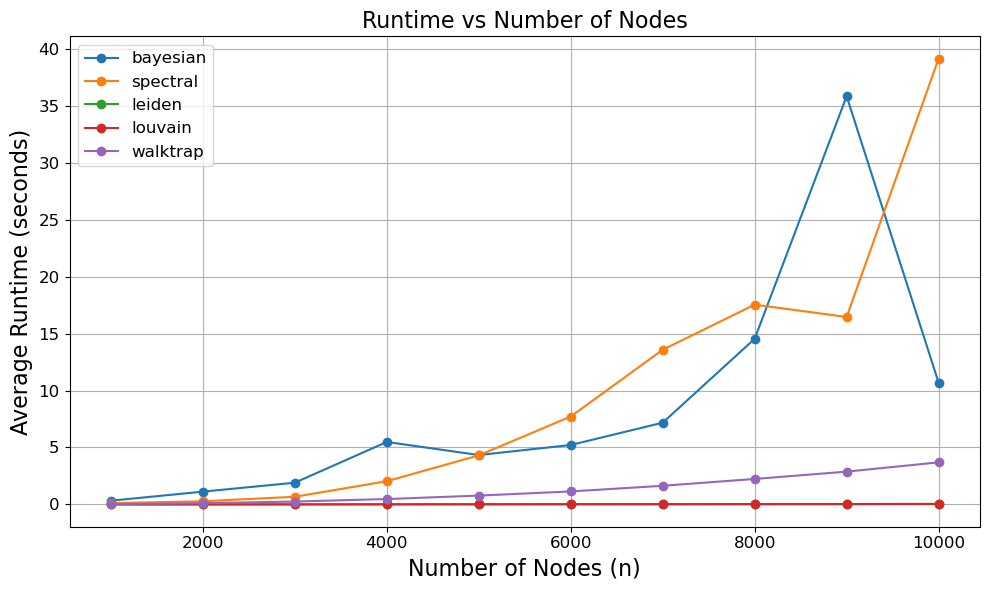

In [6]:
res_rt_vs_n = running_time_vs_n(K=10, graph_type="abcd")

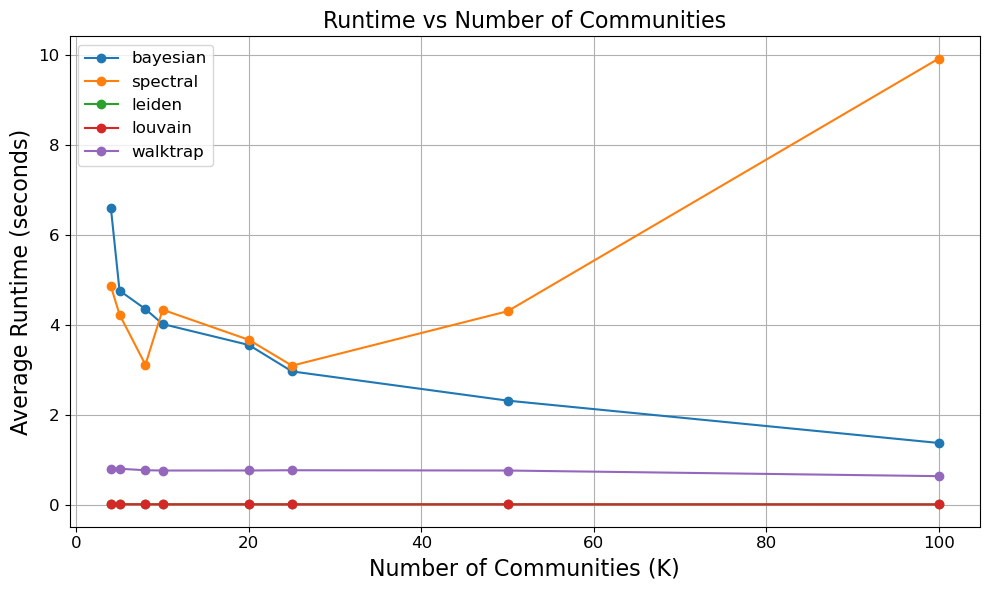

In [7]:
range_K = [4, 5, 8, 10, 20, 25, 50, 100]
res_rt_vs_k = running_time_vs_K(range_K = range_K, n=n, graph_type="abcd")

## d_max and c_min analysis


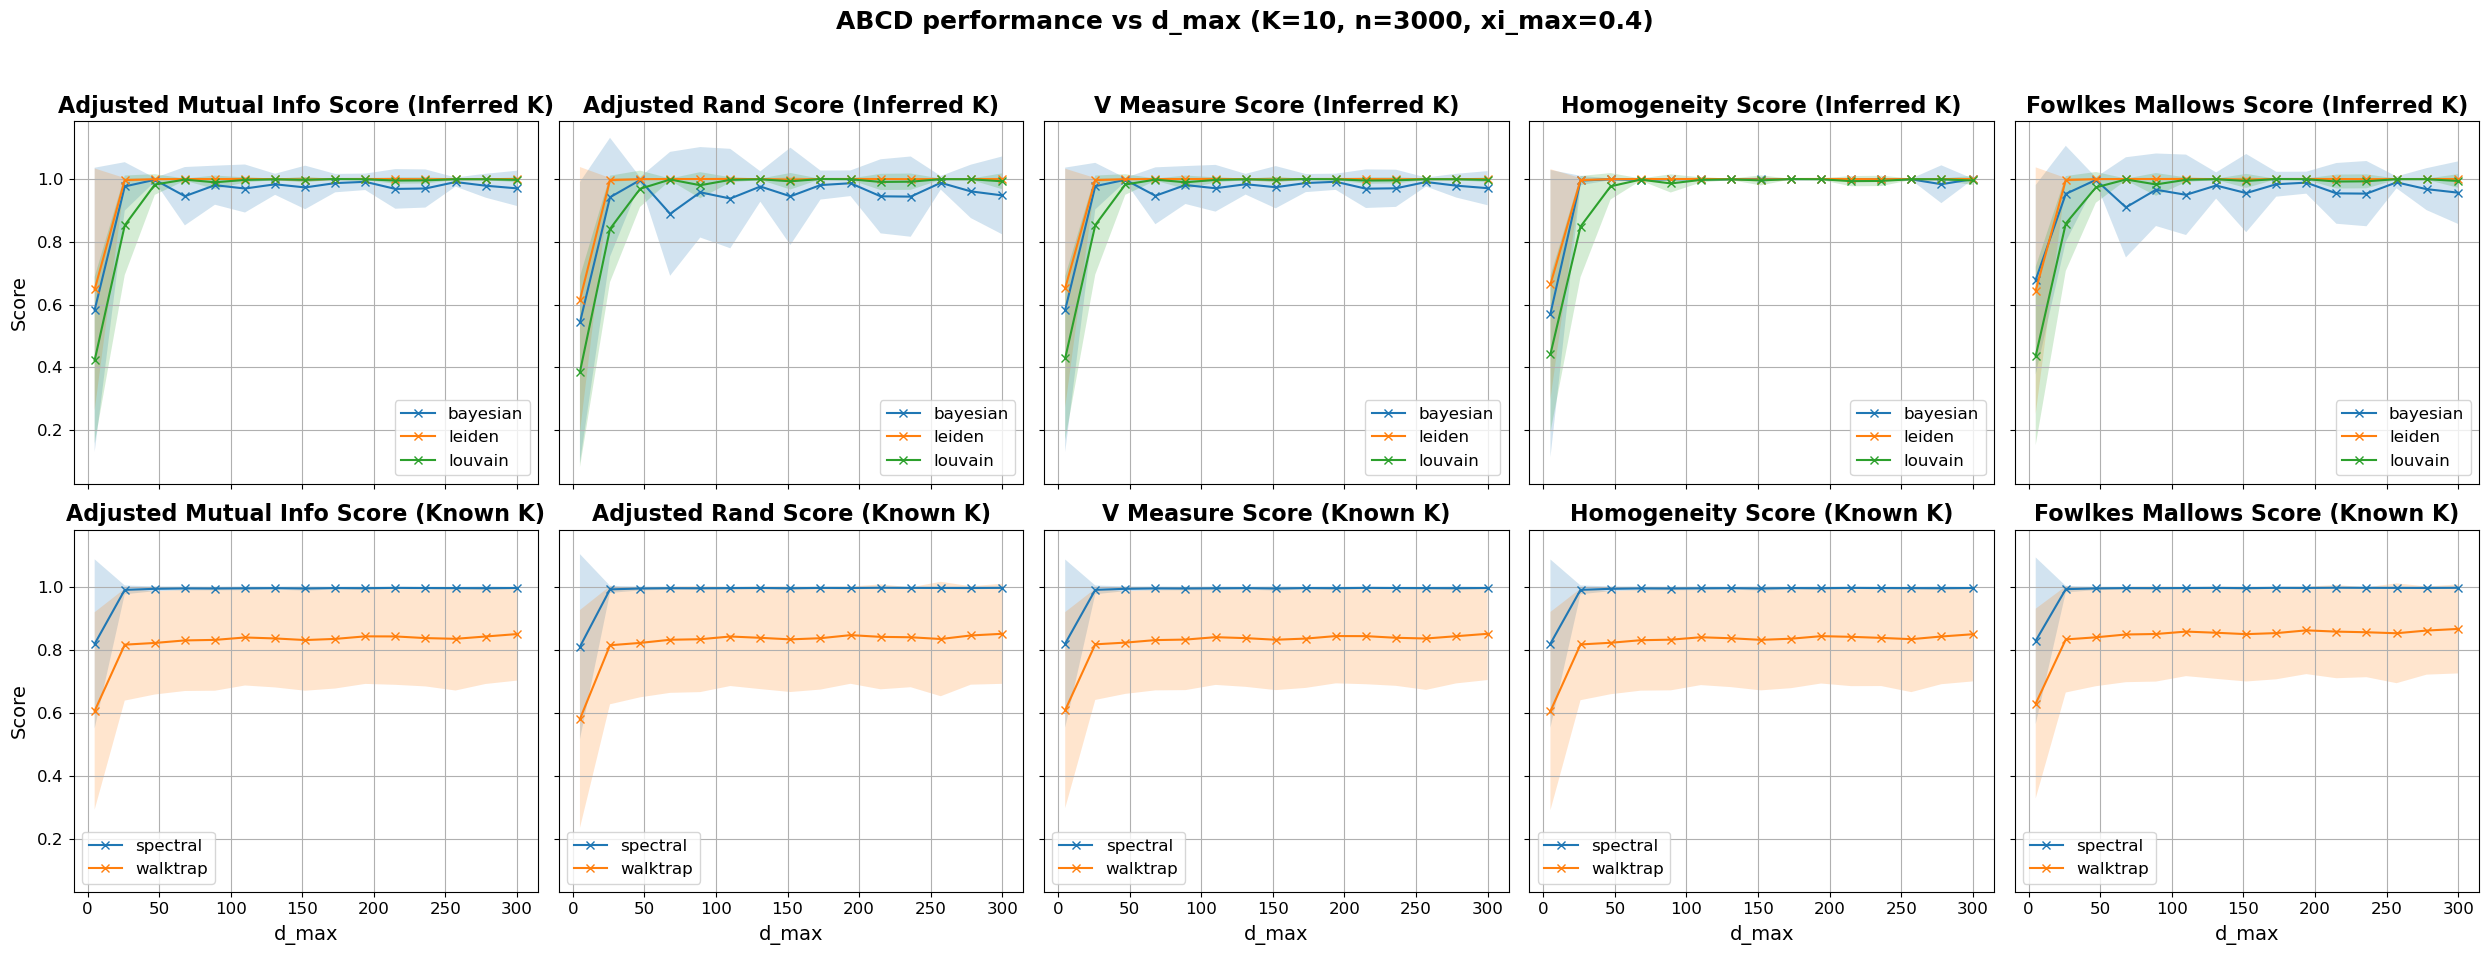

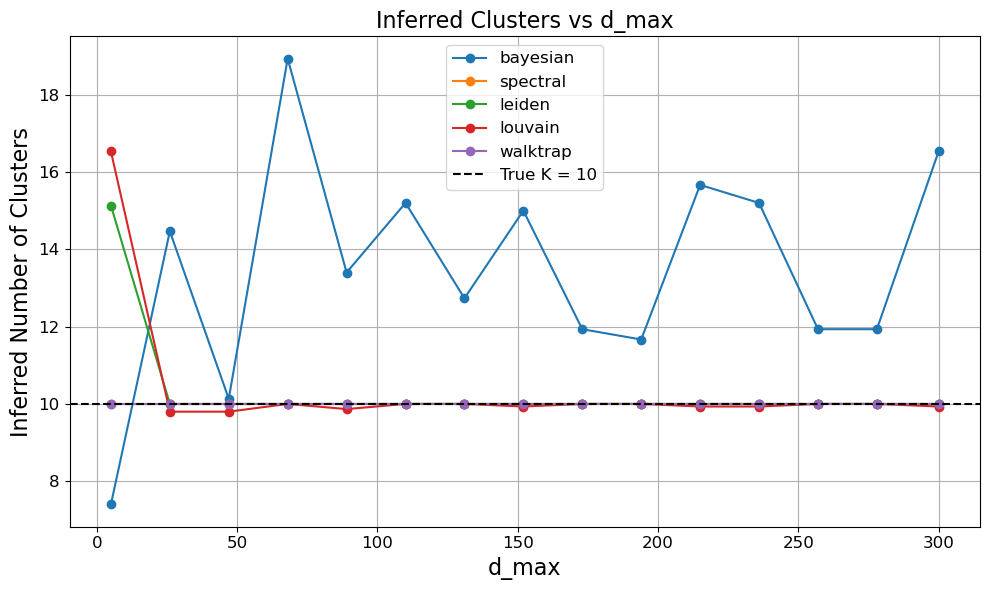

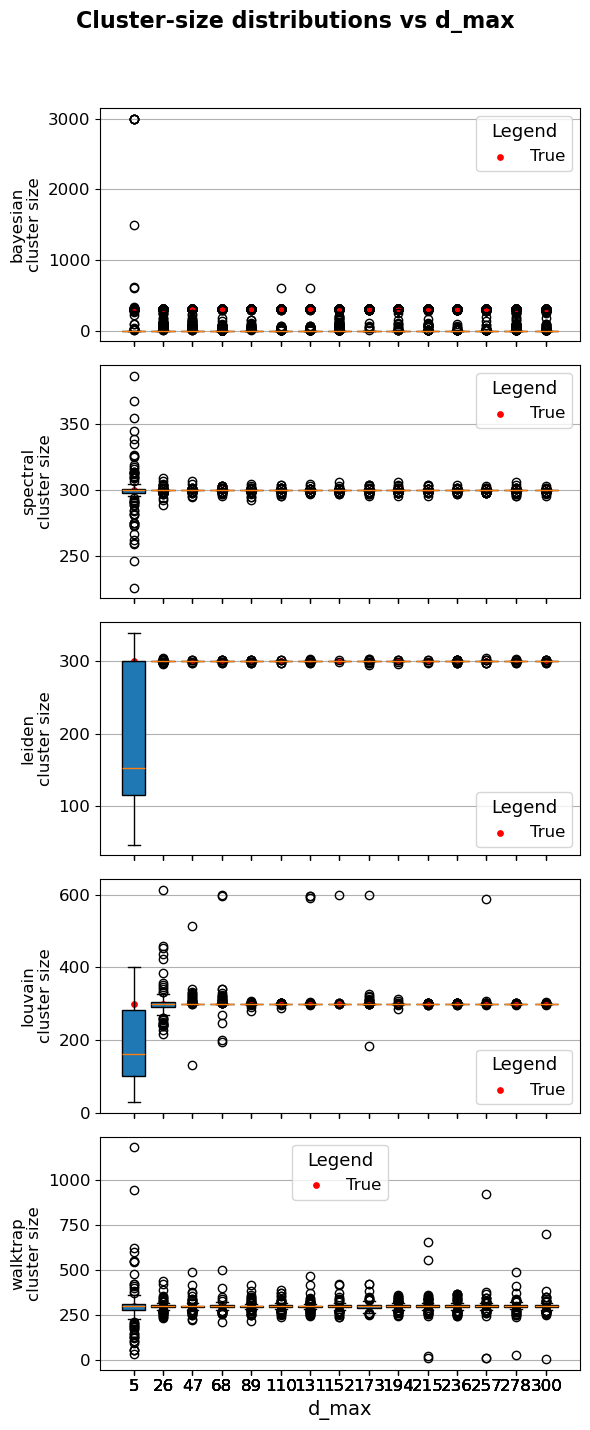

In [ ]:
res_mean_d_max, nb_clusters_d_max = validation_range_d_max(num_graphs=15, K=10, n=3000, xi_max = 0.4)

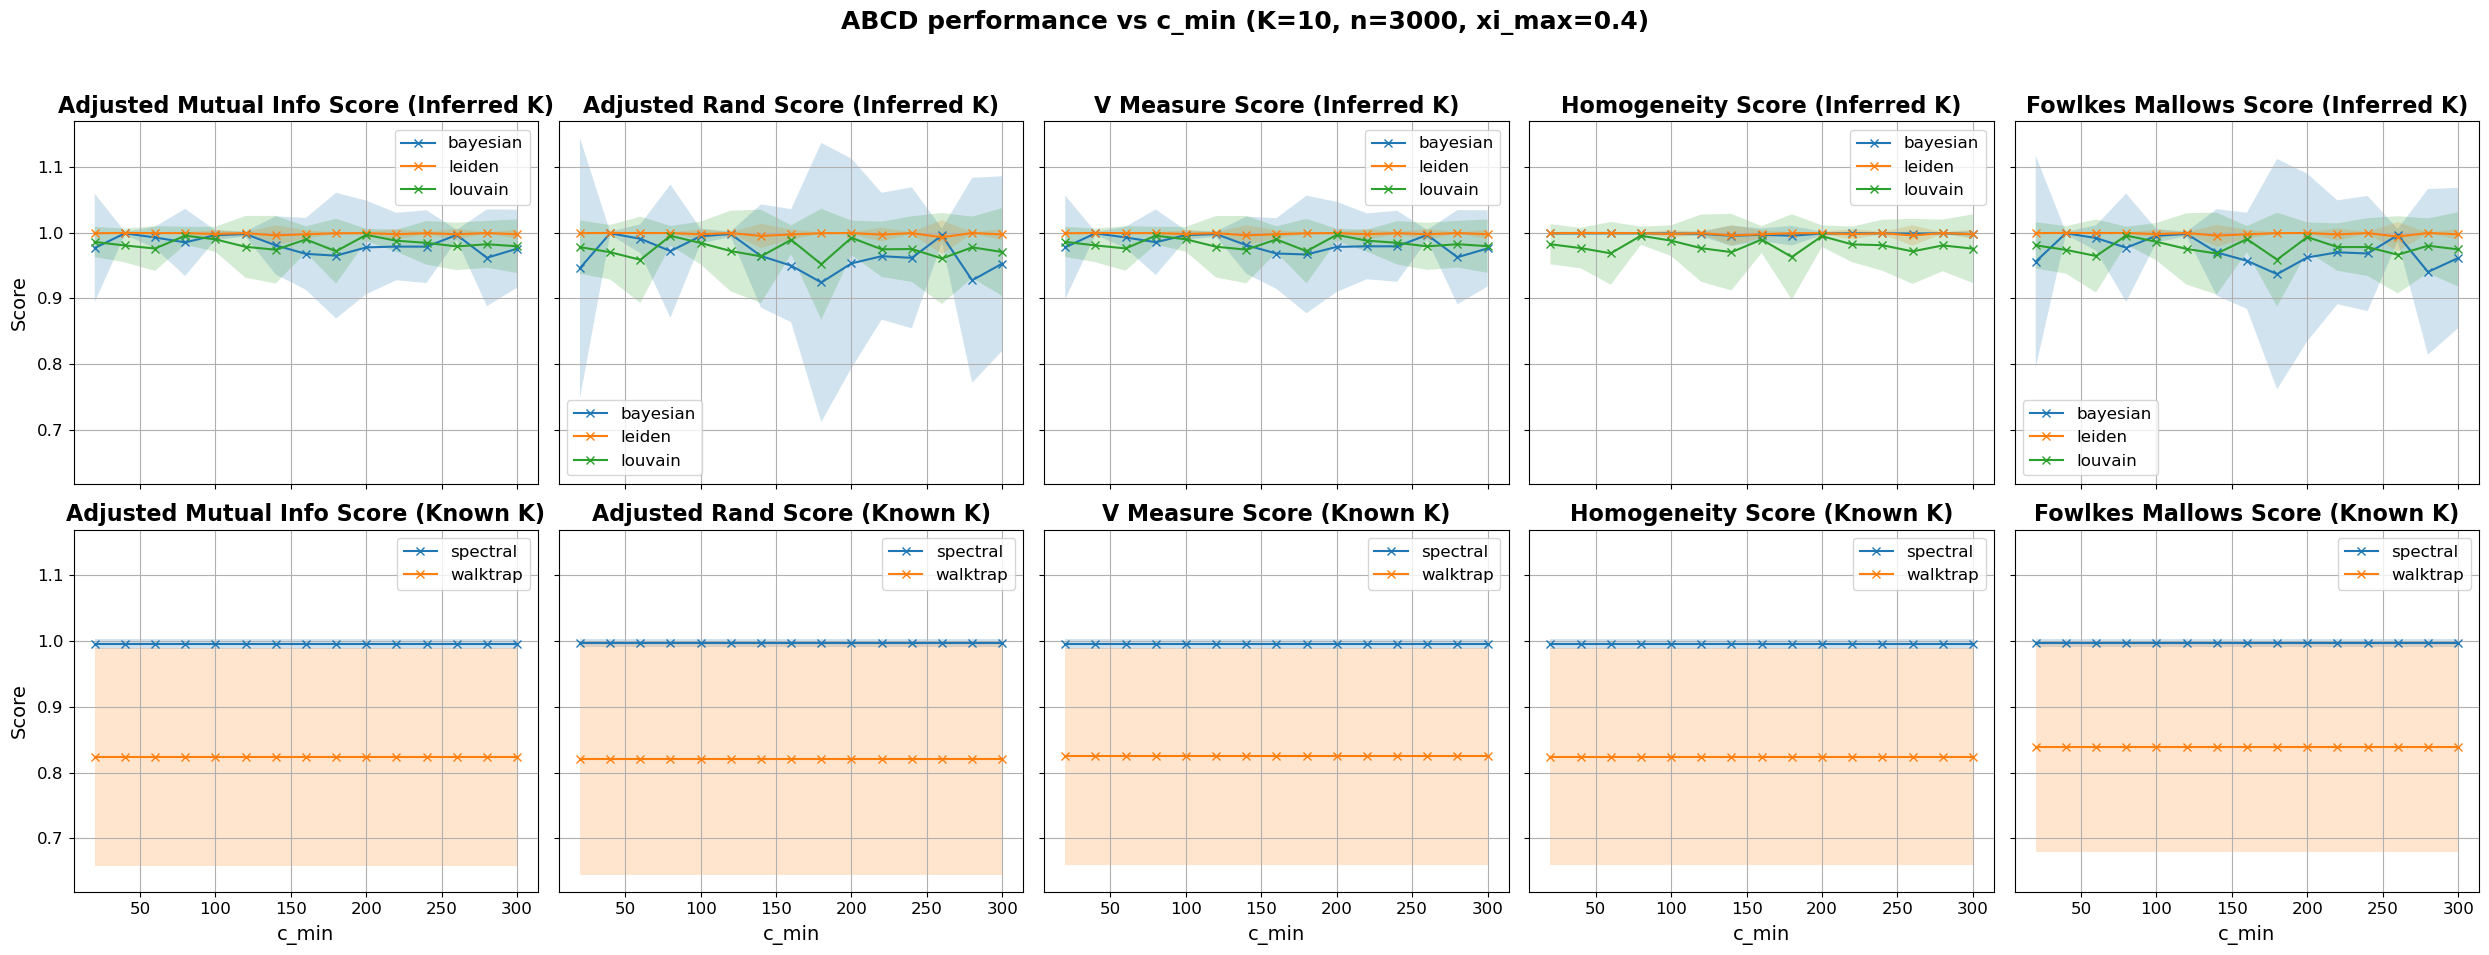

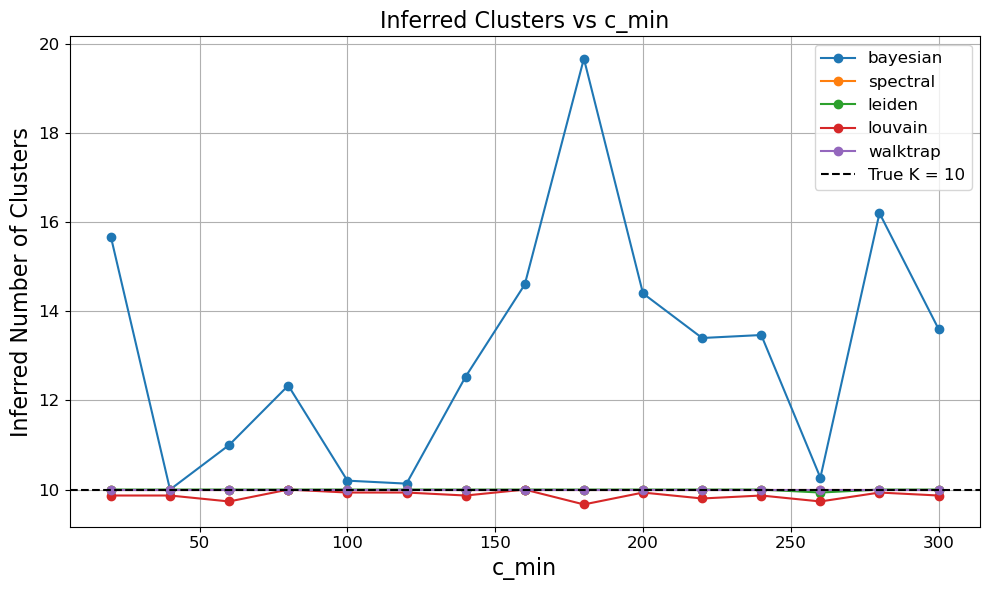

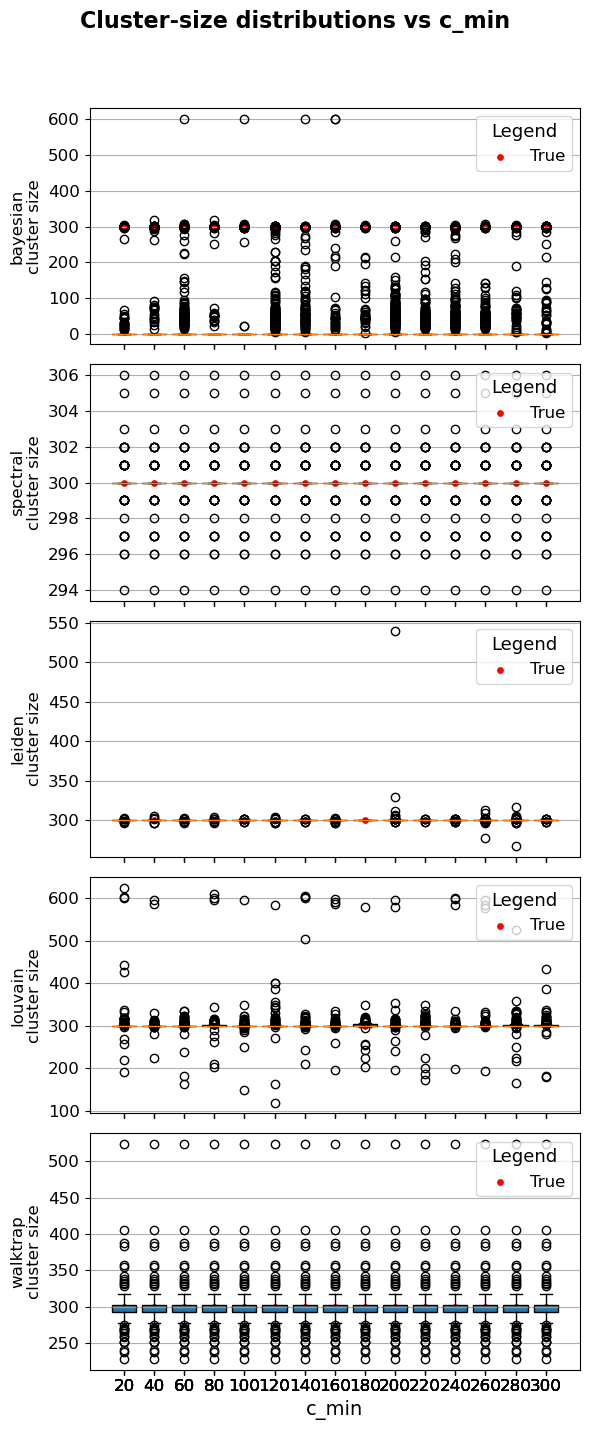

In [ ]:
res_mean_c_min, nb_clusters_c_min = validation_range_c_min(num_graphs=15, K=10, n=3000, xi_max = 0.4)